# Riid Analystics 
### Nishit Vyas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./EdNet-KT4/KT4/u8.csv')
questionsdf = pd.read_csv('./EdNet-Contents/contents/questions.csv')
paymentsdf = pd.read_csv('./EdNet-Contents/contents/payments.csv')

# Part 1

In [4]:
import os
mainDf1 = pd.DataFrame(columns=['username','num_of_questions_answered', 'num_of_correct_answers', 'num_of_explanations',
                                'num_of_lectures', 'devicesUsed', 'confidence_level', 'payments', 'duration'])
for i in os.listdir('./EdNet-KT4/KT4/'):
    df = pd.read_csv('./EdNet-KT4/KT4/'+i)
    num_of_questions_answered = df[df['action_type']=='respond']['item_id'].nunique()
    #rows with the lastest reponse
    latest_responses = df[df['action_type']=='respond'][['timestamp','item_id', 'user_answer']].groupby(by='item_id')[['timestamp', 'user_answer']].max()
    latest_responses = latest_responses.reset_index()
    latest_responses = latest_responses.sort_values(by='item_id')
    # Extracting the questions correct answers
    tempdf = questionsdf[questionsdf['question_id'].isin(latest_responses['item_id'])][['question_id','correct_answer']].sort_values(by='question_id')
    latest_responses['correct_answer'] = list(tempdf['correct_answer'])
    #Comparing the list of responses with correct answers
    num_of_correct_answers = latest_responses[latest_responses['user_answer'] == latest_responses['correct_answer']].shape[0]
    # Explanations and Lecture
    num_of_explanations = df[df['item_id'].str.contains('e')]['item_id'].nunique()
    num_of_lectures = df[df['item_id'].str.contains('l')]['item_id'].nunique()
    #additional metric
    # First: Type of devices
    device = list(df['platform'].unique())[0]
    #Second: Confidence level by "erase_choice" and adaptive offers
    confidence_level = df[df['action_type']=='erase_choice'].shape[0]
    #Third: tags explored by the users
    # How many paygo and pass
    payments = list(paymentsdf[paymentsdf['payment_item_id'].isin(df[df['action_type']=='pay']['item_id'])]['type'])
    # Duration
    duration = np.sum(paymentsdf[paymentsdf['payment_item_id'].isin(df[df['action_type']=='pay']['item_id'])]['duaration'])
    #Username
    username = i.split('.')[0]
    #Putting values in global dataframe
    mainDf1.loc[len(mainDf1.index)] = [username,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,device,confidence_level,payments,duration]
    
    df.drop(columns = df.columns, inplace=True)

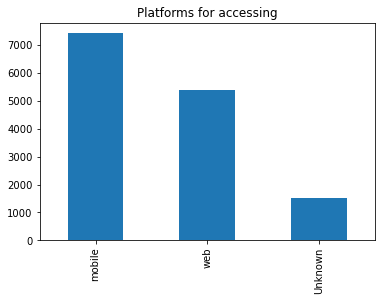

In [111]:
mainDf1['devicesUsed'].fillna('Unknown',inplace=True)
plt.title('Platforms for accessing')
#plt.xticks(rotation=90)
mainDf1['devicesUsed'].value_counts().plot.bar()
plt.show()

In [18]:
mainDf1['accuracy']=mainDf1['num_of_correct_answers']/mainDf1['num_of_questions_answered']
mainDf1['accuracy'] = mainDf1['accuracy'].replace(np.nan,0)

In [19]:
# #mainDf1['accuracy']= mainDf1['num_of_correct_answers']/ mainDf1['num_of_questions_answered']
# mainDf1[mainDf1.accuracy.isna()]['accuracy']
# mainDf1['accuracy'] = np.where(mainDf1['accuracy'].isna(),0,mainDf1['accuracy'])

In [71]:
mainDf1

,username,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,devicesUsed,confidence_level,payments,duration,accuracy
0,u100043,605,264,412,22,web,24,1,2400.0,0.436364
1,u10019,1761,1412,1766,3,web,105,0,0.0,0.801817
2,u10020,169,115,119,2,Unknown,19,1,4320.0,0.680473
3,u10021,136,96,114,1,Unknown,3,2,7800.0,0.705882
4,u10026,60,42,65,3,mobile,48,1,720.0,0.700000
...,...,...,...,...,...,...,...,...,...,...
14360,u996,14,8,4,5,mobile,0,0,0.0,0.571429
14361,u9962,9,5,10,4,web,0,1,2400.0,0.555556
14362,u997,91,75,82,3,web,6,1,4320.0,0.824176
14363,u9977,127,88,133,1,mobile,4,0,0.0,0.692913


In [24]:
mainDf1.to_csv('Table1.csv')

__Manually replaced the value in the payments column using Excel. In this sample all the students were enrolled as "pass". Therefore for this case, \[\] is replaced with _0_, \['pass'\] is replaced with _1_, \['pass','pass'\] with _2_ and furthermore.__

In [98]:
#reading the updated file
mainDf1 = pd.read_csv('Table1.csv')
mainDf1

,username,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,devicesUsed,confidence_level,payments,duration,accuracy,mixed_cols,combined_metric
0,u100043,605,264,412,22,web,24,1,2400.0,0.436364,0.063614,0.212714
1,u10019,1761,1412,1766,3,web,105,0,0.0,0.801817,0.216127,0.450403
2,u10020,169,115,119,2,Unknown,19,1,4320.0,0.680473,0.017755,0.282843
3,u10021,136,96,114,1,Unknown,3,2,7800.0,0.705882,0.015368,0.291574
4,u10026,60,42,65,3,mobile,48,1,720.0,0.700000,0.007837,0.284702
...,...,...,...,...,...,...,...,...,...,...,...,...
14360,u996,14,8,4,5,mobile,0,0,0.0,0.571429,0.001408,0.229416
14361,u9962,9,5,10,4,web,0,1,2400.0,0.555556,0.001408,0.223067
14362,u997,91,75,82,3,web,6,1,4320.0,0.824176,0.010776,0.336136
14363,u9977,127,88,133,1,mobile,4,0,0.0,0.692913,0.015980,0.286753


In [28]:
num_cols = ['num_of_questions_answered', 'num_of_correct_answers','num_of_explanations', 'num_of_lectures', 'confidence_level']
for i in num_cols:
    mainDf1[i] = mainDf1[i].astype(int)

In [29]:
mainDf1.head()

,username,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,devicesUsed,confidence_level,payments,duration
0,u100043,605,264,412,22,web,24,1,8640000000
1,u10019,1761,1412,1766,3,web,105,0,0
2,u10020,169,115,119,2,Unknown,19,1,15552000000
3,u10021,136,96,114,1,Unknown,3,2,28080000000
4,u10026,60,42,65,3,mobile,48,1,2592000000


In [30]:
mainDf1.describe()

,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,confidence_level,payments,duration
count,14365.000000,14365.000000,14365.000000,14365.000000,14365.000000,14365.000000,1.436500e+04
mean,137.800278,89.614062,112.498016,4.475740,44.752872,0.221928,1.871419e+09
std,444.964031,302.548675,365.400012,17.875819,248.400894,0.498431,4.859313e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,56.000000,33.000000,49.000000,1.000000,4.000000,0.000000,0.000000e+00
max,8315.000000,5771.000000,7772.000000,484.000000,7395.000000,6.000000,4.665600e+10


In [32]:
# Majority of students haven't made a payment
mainDf1['payments'].value_counts()

0    11648
1     2304
2      366
3       39
4        6
5        1
6        1
Name: payments, dtype: int64

In [33]:
mainDf1['duration'] =mainDf1['duration']/ 3600000

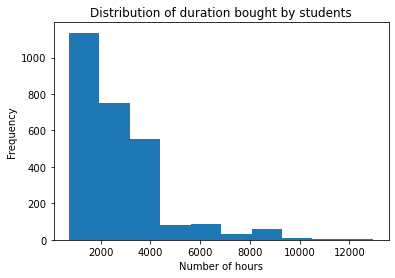

In [34]:
plt.title('Distribution of duration bought by students')
plt.xlabel('Number of hours')
plt.ylabel('Frequency')
mainDf1[mainDf1['duration']>0]['duration'].plot.hist()
plt.show()

<AxesSubplot:xlabel='duration', ylabel='Percent'>

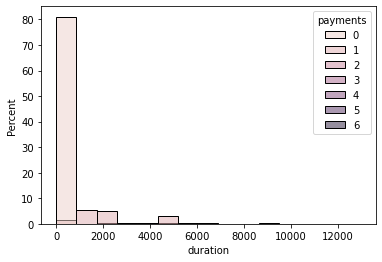

In [40]:
import seaborn as sns
sns.histplot(data=mainDf1, x='duration', hue='payments',stat='percent')

### T-test for knowing the how users use explanation to boost the accuracy  

In [239]:
# Overall Accuracy Distribution
mainDf1['accuracy'].describe()

count    14365.000000
mean         0.513932
std          0.218839
min          0.000000
25%          0.375000
50%          0.542553
75%          0.666667
max          1.000000
Name: accuracy, dtype: float64

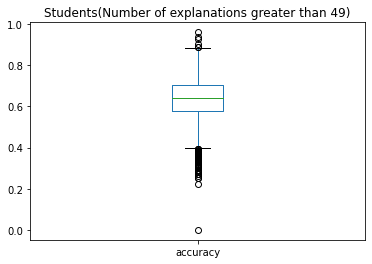

In [102]:
plt.title('Students(Number of explanations greater than 49)')
mainDf1[mainDf1['num_of_explanations']>=49]['accuracy'].plot.box()
plt.show()

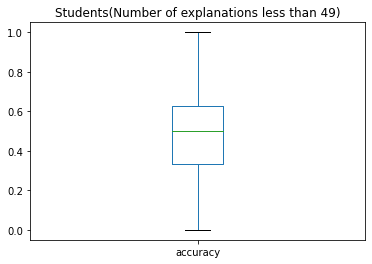

In [103]:
plt.title('Students(Number of explanations less than 49)')
mainDf1[mainDf1['num_of_explanations']<49]['accuracy'].plot.box()
plt.show()

In [235]:
mainDf1[mainDf1['num_of_explanations']>=49]['accuracy'].describe()

count    3606.000000
mean        0.636719
std         0.098404
min         0.000000
25%         0.580107
50%         0.642857
75%         0.703345
max         0.960396
Name: accuracy, dtype: float64

In [236]:
mainDf1[mainDf1['num_of_explanations']<49]['accuracy'].describe()

count    10759.000000
mean         0.472778
std          0.232274
min          0.000000
25%          0.333333
50%          0.500000
75%          0.625000
max          1.000000
Name: accuracy, dtype: float64

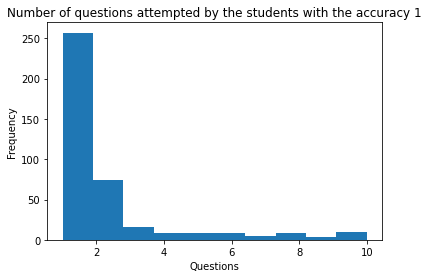

In [105]:
plt.title('Number of questions attempted by the students with the accuracy 1')
plt.xlabel('Questions')
mainDf1[mainDf1['accuracy']==1]['num_of_questions_answered'].plot.hist()
plt.show()

In [229]:
import scipy.stats as stats
data_group1 = mainDf1[mainDf1['num_of_explanations']<49]['confidence_level'].values
data_group2 = mainDf1[mainDf1['num_of_explanations']>=49]['confidence_level'].values
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-37.45101527656958, pvalue=5.63345849081431e-293)

In [240]:
print('Percent of the students who read more than 48 explanations: ',mainDf1[mainDf1['num_of_explanations']>49].shape[0]/mainDf1.shape[0])

Percent of the students who read more than 48 explanations:  0.2494256874347372


In [45]:
# Confidence level

mainDf1[mainDf1['confidence_level']>1500]['payments'].value_counts()
#mainDf1[mainDf1['confidence_level']>100]

1    34
2    22
0     8
3     3
Name: payments, dtype: int64

## Main finding on users: 
- In the sample of __14,365 students__, it is observed that the number of students using Web and Mobile as platform are significantly similar __(mobile:7433, Web:5396, Unknown:1536)__. Although more than 10% of the sample has "Unknown", it will be distributed among mobile or Web. The probable reason for the Unknown can be using the device not recognised by the app/software. 
- Nearly 25% of students in the sample have read more than 49 explanations, these students have significantly higher accuracy than the students who read less than 49 explanations. This states that reading more number of explanations  helps in improving the accuracy. __For the students who have accuracy of 1 and the number of explanations less than 49, these students have not answered more than 10 questions.__ 
- __T-test__ is conducted on the two groups mentioned in the above point. __The results suggests that with the confidence level of 95% , we reject the null hypothesis (H0:The difference in accuracy of both the groups is zero.). We observed significant difference in the accuracy of both the groups__.
- Addtional three metrics to describe users that I used ("Platform Used", "Type of Payments made by users")
- Third metric based on which I want to compare the users is how accuracy corresponds to the payments. Is there a pattern where the students making payments are progressing well and others are not. 


# Part 2

#### Creating the Questions Profile Table.

In [141]:
main_df = pd.DataFrame(columns=['question_id', 'correct_answer', 'user_answer', 'correct_flag',
       'question_flag'])
questionsdf = pd.read_csv('./EdNet-Contents/contents/questions.csv')
for i in os.listdir('./EdNet-KT4/KT4/'):
    df = pd.read_csv('./EdNet-KT4/KT4/'+i)
    repond_responses = df[df['action_type']=='respond']
    tempdf = questionsdf[questionsdf['question_id'].isin(repond_responses['item_id'])][['question_id','correct_answer']]
    repond_responses2 =  pd.merge(left=tempdf, right=repond_responses, left_on='question_id', right_on='item_id', how='right')
    repond_responses2.drop(columns=['item_id', 'timestamp','cursor_time','source','action_type','platform'], inplace=True)
    repond_responses2['correct_flag'] = np.where((repond_responses2['user_answer'] == repond_responses2['correct_answer']), 
                                            1, 0)
    repond_responses2['question_flag']=1
    main_df = main_df.append(repond_responses2, ignore_index=True)

In [142]:
main_df['question_id'].value_counts()

q3935     3439
q11261    3241
q11263    3163
q11259    3047
q3788     3035
          ... 
q7651       10
q17661      10
q7747        9
q17660       9
q16961       4
Name: question_id, Length: 11551, dtype: int64

In [146]:
main_df.head()

,index,question_id,correct_answer,user_answer,correct_flag,question_flag
0,0,q4078,c,c,1,1
1,1,q6068,a,b,0,1
2,2,q6056,b,d,0,1
3,3,q4719,b,d,0,1
4,4,q6725,c,d,0,1


In [147]:
main_df.to_csv('QuestionProfileTable2.csv')

In [47]:
main_df = pd.read_csv('QuestionProfileTable2.csv')
main_df

,Unnamed: 0,index,question_id,correct_answer,user_answer,correct_flag,question_flag
0,0,0,q4078,c,c,1,1
1,1,1,q6068,a,b,0,1
2,2,2,q6056,b,d,0,1
3,3,3,q4719,b,d,0,1
4,4,4,q6725,c,d,0,1
...,...,...,...,...,...,...,...
3062967,3062967,3062967,q9672,a,b,0,1
3062968,3062968,3062968,q6071,b,c,0,1
3062969,3062969,3062969,q3700,a,a,1,1
3062970,3062970,3062970,q6071,b,b,1,1


In [48]:
questions_groupby = main_df.groupby(by='question_id')[['correct_flag', 'question_flag']].sum().reset_index()

In [49]:
questions_groupby2 = pd.merge(left=questionsdf,right=questions_groupby,on='question_id')

In [50]:
questions_groupby2.to_csv('QuestionProfileMain.csv')

In [51]:
questions_groupby2['accuracy'] =questions_groupby2['correct_flag']/questions_groupby2['question_flag'] 

In [52]:
questions_groupby2

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,correct_flag,question_flag,accuracy
0,q1,b1,e1,b,1,1;2;179;181,1558093217098,196,229,0.855895
1,q2,b2,e2,a,1,15;2;182,1558093219720,192,215,0.893023
2,q3,b3,e3,b,1,14;2;179;183,1558093222784,824,1601,0.514678
3,q4,b4,e4,b,1,9;2;179;184,1558093225357,519,693,0.748918
4,q5,b5,e5,c,1,8;2;179;181,1558093228439,317,810,0.391358
...,...,...,...,...,...,...,...,...,...,...
11546,q18139,b12202,e12202,b,2,24;26;183;182,1571733814684,24,28,0.857143
11547,q18140,b12203,e12203,a,2,24;33;183;182,1571733815331,19,23,0.826087
11548,q18141,b12204,e12204,a,2,24;26;183;182,1571733815951,16,17,0.941176
11549,q18142,b12205,e12205,a,2,24;26;183;182,1571733816585,16,22,0.727273


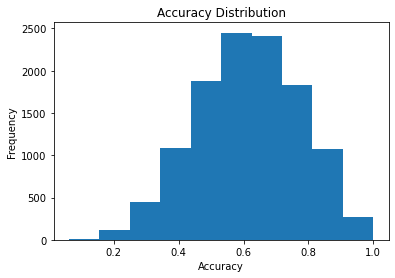

In [100]:
plt.title('Accuracy Distribution')
plt.xlabel('Accuracy')
questions_groupby2['accuracy'].plot.hist()
plt.show()

C:\Users\Nishit Vyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


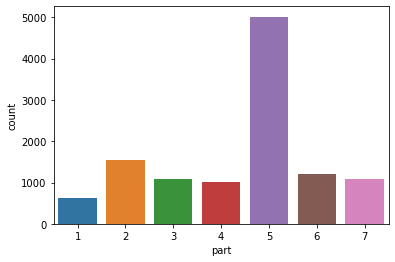

In [56]:
sns.countplot(questions_groupby2['part'])
plt.show()

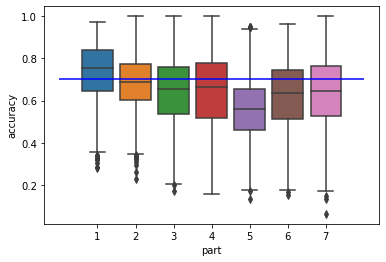

In [63]:
sns.boxplot(data=questions_groupby2, x = 'part', y='accuracy')
plt.hlines(y=0.7,colors='b',xmax=7,xmin=-1)
plt.show()

__The questions in part 5 is maximum, due to this the accuracy of question in part 5 is significantly lower than other parts.__

## Understanding how questions are divided as per the accuracy of the questions.

- The main finding here was 25% of tags can be classified as difficult as the accuracy was less than 50%. Further information on how many times these questions are attempted should also be taken into the consideration. 
- The difficulty of questions increases with the part number.

In [285]:
questions_groupby2['accuracy'].describe()

count    11551.000000
mean         0.614274
std          0.158171
min          0.061856
25%          0.503605
50%          0.617143
75%          0.730769
max          1.000000
Name: accuracy, dtype: float64

In [291]:
questions_groupby2[questions_groupby2['accuracy']<0.5]['part'].value_counts()

5    1690
6     280
4     226
7     217
3     202
2     110
1      56
Name: part, dtype: int64

In [292]:
questions_groupby2[questions_groupby2['accuracy']<0.5]['tags'].value_counts()

85                             264
74                             203
77                             193
76                             174
83                             136
                              ... 
146;158;166;179;178;153;178      1
52;184;182;181                   1
30;24;25;182;181                 1
52;184;181;185                   1
146;147;179;176;151;176          1
Name: tags, Length: 579, dtype: int64

In [297]:
questions_groupby2[questions_groupby2['accuracy']>0.5]['part'].value_counts()

5    3292
2    1436
6     914
3     883
7     850
4     775
1     565
Name: part, dtype: int64

In [293]:
questions_groupby2[questions_groupby2['accuracy']>0.5]['tags'].value_counts()

74                     462
85                     317
77                     303
71                     219
76                     215
                      ... 
23;24;25;184;181         1
159;179;177;156;177      1
6;7;179;181              1
30;38;39;184;181         1
179;53;185;183           1
Name: tags, Length: 1564, dtype: int64

# Part 3
## Modified metric for accuracy

- The new metric can be developed considering the duration, num_of_explanation_read, num_of_lecture_watched along with the num_of_correct_answers. Simplifying more, there should be two different metric such as "Activity metric" and "Existing accuracy".
- The combination of both the metrics will be the final metric. Weights can be given to the columns contributing in activity tracking. Earlier, we got to know that reading explanation has helped the students significantly in improving the number of correct answers. Therefore more weight should be given to the number of explantion parameter. 



In [75]:
mainDf1['mixed_cols'] = mainDf1['num_of_questions_answered']+mainDf1['num_of_explanations']+mainDf1['num_of_lectures']
mainDf1['mixed_cols'] = mainDf1['mixed_cols']/mainDf1['mixed_cols'].max()

In [79]:
mainDf1.drop(mainDf1[mainDf1['mixed_cols']==0].index, inplace=True)

In [81]:
mainDf1['combined_metric'] = 0.6*mainDf1['mixed_cols'] + 0.4*mainDf1['accuracy']

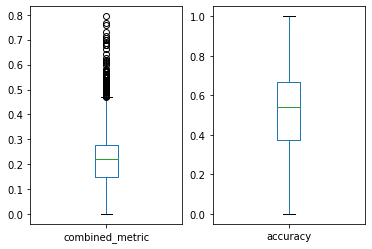

In [87]:
plt.subplot(1,2,1)
mainDf1['combined_metric'].plot.box()
#plt.plot.box(mainDf1['combined_metric'])
plt.subplot(1,2,2)
mainDf1['accuracy'].plot.box()
#plt.plot.box(mainDf1['accuracy'])
plt.show()

## Observations on Metrics
- After considering the other paramters, the distribution in metrics changed significantly. The median dropped to around 20%. Althought there are many outliers in the combined metric which gives a solid idea on how the students are exploring the application and software. Majority of students have the combined metric less than 50% but the students who have gone through the different material in the application and answered well are there as the outliers(in the box plot). 

# Part 4
Pick a user with a reasonable amount of activity (you will need to define the “reasonableness” and specify the criteria) and create a dashboard that consists of a series of plots to tell a story of this user’s activity patterns. For inspiration, you may look at the user dashboard for fitness trackers such as Fitbit. 

In [95]:
mainDf1[mainDf1.combined_metric==mainDf1.combined_metric.max()].index

Int64Index([13909], dtype='int64')

In [106]:
i=13909
print('Dashboard')
print('Username: ',mainDf1.username[i])
print('Questions User attempted: ',mainDf1.num_of_questions_answered[i])
print('Total Questions: ', questionsdf.shape[0])
print('Metric of Exploration: ',mainDf1.mixed_cols[i])
print('Median Metric(Know where you stand with other students): ',mainDf1.mixed_cols.median())
print('Hours you spent on the platform: ', mainDf1.duration[i])
print('Payments done/due: ', mainDf1.payments[i])

Dashboard
Username:  u7531
Questions User attempted:  7512
Total Questions:  13169
Metric of Exploration:  0.8110573685177248
Median Metric(Know where you stand with other students):  0.0006122573930080206
Hours you spent on the platform:  1440.0
Payments done/due:  1


## Next steps:
- The information on the student's strongest part of the questions and the weakest part of the questions should be provided. So that the student can explore more content and excel.